# 15.3: Area Using Double Integrals

Author: Justin Lemmon

### Brief Review

We know that the volume under a surface $S$ given by graphing a function $f(x,y)$ over a region $R$ can be represented by a partial sum

$$V \approx  S_n = \sum_{k=1}^n f(x_k,y_k)\ \Delta A_k$$

And that we can take the limit of the partial sum as the norm approaches zero to arrive at a formula in terms of what we call a double integral

$$V = \lim_{||P\ ||\to 0}\sum_{k=1}^n f(x_k,y_k)\ \Delta A_k = \iint_R f(x,y)\ dx\ dy$$

### Area

What if we wanted to use our new tool, iterated integrals, to calculate areas of regions in the plane instead of volumes? Let's use the following region as a sort of general example to explain where the formula comes from.




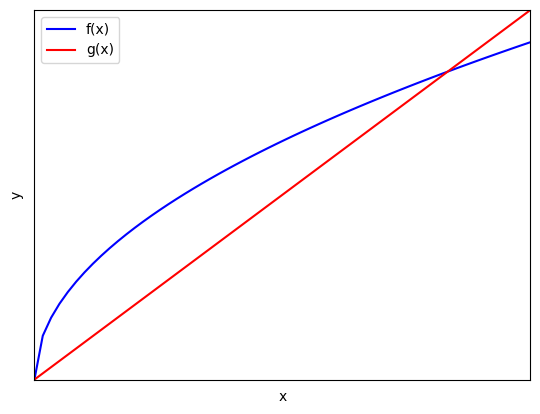

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1/2)*x**.5

def g(x):
    return x
xarr = np.linspace(0,.5,100)


plt.plot(xarr,f(xarr),"-b",label="f(x)")
plt.plot(xarr, g(xarr), "-r",label="g(x)")
plt.axis([0, .3, 0, .3])
plt.xticks([])
plt.yticks([])
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

We know that the volume of the solid created by plotting a function $h(x,y)$ over the shown region $R$ can be approximated by

$$V \approx  S_n = \sum_{k=1}^n h(x_k,y_k)\ \Delta A_k$$

We also know that a general formula for volume is $B \times h$, where $B$ is the area of the base of the solid and $h$ is its height. In this case, $B$ is the area between $f(x)$ and $g(x)$, and $h$ is our function $h(x,y)$

So, we can, in a sense, divide by the height $h(x,y)$ to find an approximation for the area of this region (mathematically, what we are really doing is setting $h(x,y) = 1$ so that the height won't multiply our base area by anything)

$$A \approx  S_n = \sum_{k=1}^n\Delta A_k$$

We then take the limit as the norm $||P\ ||$ goes to zero (recall that this is the maximum size of any dimension of any individual partition) to achieve an exact formula in terms of a double integral. In a sense, we are calculating the areas of infinitely many rectangles with infinitely small length and width that as a whole make up our original region
. 
$$A = \lim_{||P\ ||\to 0}\sum_{k=1}^n\Delta A_k = \iint_RdA$$

Which, when we apply Fubini's theorem to our above example, is equal to

$$A = \int_a^b\int_{g(x)}^{f(x)}dy\ dx$$

Going one step further and evaluating the y-integral gives us

$$A = \int_a^b((f(x)-g(x))\ dx$$

Notice that this looks exactly like how we computed the area of these regions back in single variable calculus, which should garner some trust for this new formula

### Example 1

Calculate the area between the curves $f(x)=x$ and $g(x)=\sqrt{x}$

First, we need to find the intersection points. These will be the bounds of one of our integrals

$$x=\sqrt{x}\implies x-\sqrt{x}=0\implies x=0,\ x=1$$

Next, we set up our integral and apply Fubini's theorem

$$A = \int_0^1\int_x^{\sqrt{x}}dy\ dx$$

Then we evaluate

$$A = \int_0^1\left(\sqrt{x}-x\right)dx$$

$$A = \left(\frac{2}{3}x^{3/2}-\frac{1}{2}x^2\right)_0^1$$

$$A = \left(\frac{2}{3}-\frac{1}{2}\right) = \frac{1}{6}$$

### Average value

Recall from single variable calculus that we calculated the average value of a function $f(x)$, we used the following formula: 

$$\frac{1}{b-a}\int_a^bf(x)\ dx$$

How can we interpret this formula? Try visualizing a rectangle whose height is the average value of the function. We know that this rectangle has the same area as the area under the curve of $f(x)$ over the interval $a\leq x\leq b$, so we can compute the average value by taking the area (which we can calculate with the integral over the given interval)

Now, how can we extend this formula into the extra dimension we are now working with in order to calculate the average value (height) of a function $f(x,y)$ graphed over a region $R$? It turns out that it is exactly what it seems like it would be:

$$\text{Average value of $f$ over $R$} = \frac{1}{\text{area of $R$}} \iint_RdA$$

To interpret this, imagine filling the entire volume of $f(x,y)$ over $R$ with water and allowing it to level out and freeze (where the boundaries of $R$ form walls that the fluid cannot pass), thus forming a solid with the same base as previously and a constant height equal to the average value of $f(x,y)$ over the surface. 

This is clearly the same volume of water, so we now divide this volume (which is the volume calculated by the double integral) by the area of the base of the solid, which is the area of the region $R$

Region filled with fluid:

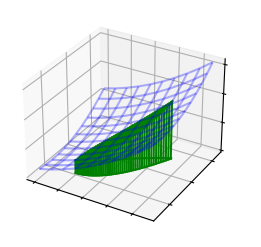

In [18]:
x = np.arange(2, 7, .5)
y = np.arange(-1, 5, .5)

x, y = np.meshgrid(x, y)

zlam = lambda x, y: (x ** 2) + (y ** 2)
zfunc = np.vectorize(zlam)

z = zfunc(x,y)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(x, y, z, color='b', alpha=0.3)

xarr = np.arange(3,5.52,.05)

def h(x):
    return (2)*np.sqrt(x-3)
def i(x):
    return (1/2)*(x-3)**2
def zz(x,y):
    return (x ** 2) + (y ** 2)

ax.plot(xarr,h(xarr),"-g")
ax.plot(xarr,i(xarr),"-g")
for a in xarr:
    ax.plot((a,a),(i(a),i(a)),(0,zz(a,i(a))),color="green")
    ax.plot((a,a),(h(a),i(a)),(zz(a,h(a)),zz(a,i(a))),color="green")
    
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

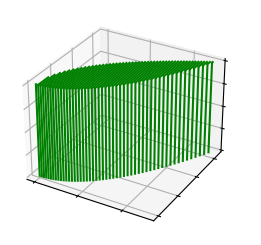

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')

for a in xarr:
    ax.plot((a,a),(i(a),i(a)),(0,20.0281664442),color="green")
    ax.plot((a,a),(h(a),i(a)),(20.0281664442,20.0281664442),color="green")
    
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

This is the aforementioned solid, and looking at the visual, it is clear that we simply need to divide by area of the base, which is the area of our region $R$, to compute the height of the solid, which is the average value of $f(x,y)$ over $R$

### Example 2

Calculate the average value of $f(x,y)= x+y^2$ over the region $R:1\leq x\leq 2,\ \frac{1}{2}x^2\leq y\leq x$

Let us begin by calculating the area of the region:

$$A = \int_1^2\int_{\frac{1}{2}x^2}^xdy\ dx$$

$$A = \int_1^2\left(x-\frac{1}{2}x^2\right)dx$$

$$A = \left(\frac{1}{2}x^2-\frac{1}{6}x^3\right)_1^2$$

$$A = \left(2-\frac{8}{6}\right)-\left(\frac{1}{2}-\frac{1}{6}\right) = \frac{3}{2}-\frac{7}{6} = \frac{1}{3}$$

Now we need to calculate the volume of $f(x,y)$ graphed over $R$:

$$V = \int_1^2\int_{\frac{1}{2}x^2}^x(x+y^2)dy\ dx$$

$$V = \int_1^2\left(xy+\frac{1}{3}y^3\right)_{\frac{1}{2}x^2}^xdx$$

$$V = \int_1^2\left((x^2+\frac{1}{3}x^3)-(\frac{1}{2}x^3+\frac{1}{24}x^6)\right) dx$$

$$V = \int_1^2\left(x^2-\frac{1}{6}x^3-\frac{1}{24}x^6\right)dx$$

$$V = \left(\frac{1}{3}x^3-\frac{1}{24}x^4-\frac{1}{168}x^7\right)_1^2$$

$$V = \left(\frac{8}{3}-\frac{16}{24}-\frac{128}{168}\right)-\left(\frac{1}{3}-\frac{1}{24}-\frac{1}{168}\right)$$

$$V = \left(\frac{448}{168}-\frac{112}{168}-\frac{128}{168}\right)-\left(\frac{56}{168}-\frac{7}{168}-\frac{1}{168}\right)$$

$$V = \frac{160}{168} = \frac{20}{21}$$

And now to combine these results, we divide the volume by the area of the base to attain the average value of $f(x,y)$ over $R$

$$\text{Average value }= \frac{V}{A} = \frac{\frac{20}{21}}{\frac{1}{3}} = \frac{20}{7}$$